# Regression

## Introduction to regression

### Importing data for supervised learning

If the target variable is continuously varying variable, this is a regression problem.

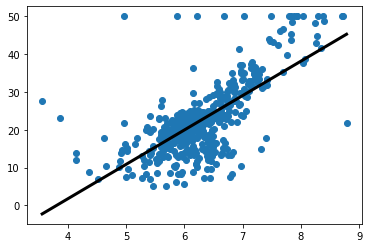

In [1]:
# from urllib.request import urlretrieve
# url = "https://assets.datacamp.com/production/repositories/628/datasets/021d4b9e98d0f9941e7bfc932a5787b362fafe3b/boston.csv"
# data = urlretrieve(url, "boston.csv")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
boston = pd.read_csv("boston.csv")
X = boston.drop("MEDV", axis = 1).values
y = boston["MEDV"].values
X_rooms = X[:, 5]
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1,1)
reg = LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms), max(X_rooms))


plt.scatter(X_rooms, y)
plt.plot(prediction_space, reg.predict(prediction_space), color="black", linewidth=3)
plt.show()

### Importing data for supervised learning

In [10]:
# url = "https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv"
# data = urlretrieve(url, "gapminder.csv")
df = pd.read_csv("gapminder.csv")

y = df["life"].values
X = df["fertility"].values
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))
y = y.reshape(-1,1)
X = X.reshape(-1,1)
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


### Exploring the Gapminder data


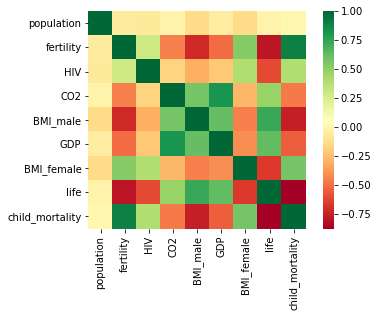

In [16]:
import seaborn as sns
sns.heatmap(df.corr(),cmap='RdYlGn', square=True)
plt.show()

## The basics of linear regression

The line that is fit to the data has two dimensions is always of the form y = ax + b, y is the target, x is the single feature and a and b are the parameters of the model we want to learn. Choosing a and b is done by defining an error function for any given line that is the minimum. Minimizing the vertical distance between the fit and the data. The distance is called residual and square of their distance are calculated preventing the cancel out. -> Ordinary least squares.

But generally linear regression is never used like this. Regularization is more preferred.

### Fit & predict for regression


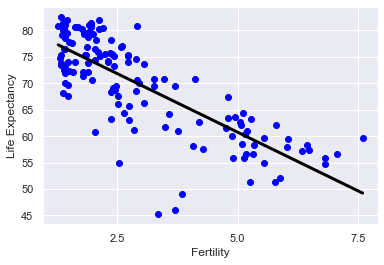

R^2: 0.6192442167740035


In [83]:
y = df["life"].values
X_fertility = df["fertility"].values
y = y.reshape(-1,1)
X_fertility = X_fertility.reshape(-1,1)

sns.set()
plt.scatter(X_fertility, y, color="blue")
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")

reg = LinearRegression()
reg.fit(X_fertility, y)
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)
y_pred = reg.predict(prediction_space)
plt.plot(prediction_space,y_pred, color="black", linewidth=3)
plt.xticks([2.5, 5, 7.5])
plt.show()
print("R^2:",reg.score(X_fertility, y))


### Train/test split for regression

Train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data.

The Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models.

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
df_no_region = df.drop("Region", axis=1)
X = df_no_region.drop("life", axis=1).values
y = df_no_region["life"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    test_size=0.3)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


## Cross-validation

The calculated R squared is dependent on the the way how the data split. The data points in the test set may have some peculiarities that mean the R squared computed on it is not representative of the model's ability to generalize the unseen data. So cross-validation is used to combat this dependence on arbitrary split.

### 5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

The score reported is R squared as this is the default score for linear regression.

In [63]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv=5)
print(cv_scores)
print("Average 5-fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-fold CV Score: 0.8599627722793505


Now the model's predictions can be evaluated more confidently.

### K-Fold CV comparison

Cross validation is essential but  more folds the more computationally expensive cross-validation becomes. 

In [69]:
reg = LinearRegression()
%timeit cross_val_score(reg, X, y, cv=3)
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))
%timeit cross_val_score(reg, X, y, cv=10)
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

5.6 ms ± 536 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8718712782622265
15.7 ms ± 606 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8436128620131369


## Regularized regression

Linear regression minimizes a loss function and it chooses a parameter for each feature variable. If parameters are allowed to be super large it leads to overfitting and it predicts nearly anything for high dimension data. So penalizing for large parameters is common and it is regularization. Ridge regression is a type of regularized regression. Alpha is a parameter we need to choose like k in K-nn. Alpha controls the model complexity. 

IF alpha is 0 -> OLS. Large coefficients are not penalized and overfitting problm is not accounted for. Large alpha mean large coefficients are significantly penalized that leads to a model that is too simple -> Underfitting.

Lasso regression can be used to select important feature of a dataset. Shirinks the coefficients of less important features to exactly 0. If not the features are selected by lasso algorithm. Reporting important features of a linear model cannot be overestimated.

### Regularization I: Lasso

 Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

0.4948632173434634
[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


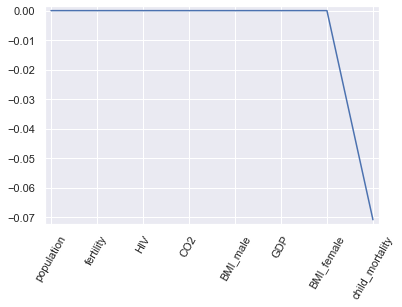

In [102]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X, y)
print(lasso.score(X,y))
lasso_coef = lasso.coef_
print(lasso_coef)
df_columns = df.drop(["life", "Region"], axis=1).columns
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.



### Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be the first choice.

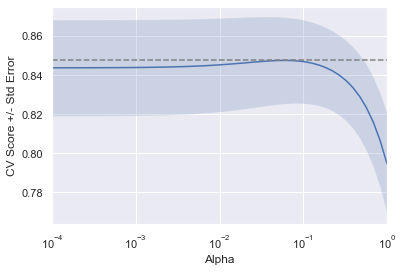

In [122]:
from sklearn.linear_model import Ridge
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize=True)

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
display_plot(ridge_scores, ridge_scores_std)

In [132]:
X = df_no_region.drop("life", axis=1).values
y = df_no_region["life"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    test_size=0.3)
print("For LinearRegression")
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred_reg = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
print("Root Mean Squared Error: {}".format(rmse))

print("For Lasso")
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train, y_train)
y_pred_las = lasso.predict(X_test)
print("R^2: {}".format(lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_las))
print("Root Mean Squared Error: {}".format(rmse))

print("For Ridge")
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
y_pred_rid = ridge.predict(X_test)
print("R^2: {}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rid))
print("Root Mean Squared Error: {}".format(rmse))

For LinearRegression
R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455
For Lasso
R^2: 0.6660274241031177
Root Mean Squared Error: 4.663622743321709
For Ridge
R^2: 0.8442469959975749
Root Mean Squared Error: 3.1848297709707083
